# illustrates the use of the `ensemble` and `analogs` classes

In [1]:
%matplotlib inline

### adds paleopy to the Python path

In [2]:
import sys

In [3]:
sys.path.insert(0, '../')

In [4]:
from paleopy import ensemble
from paleopy import analogs
from paleopy.plotting import scalar_plot

### where to find the jsons defining the datasets, and the proxies jsons

In [5]:
pjsons = '../jsons/proxies'

### instantiates an `ensemble` class

In [6]:
ens = ensemble(pjsons=pjsons, season='DJF')

### calculates the analog composite in the ERSST SSTs, uses all repeated years (the default)

In [7]:
sst = analogs(ens, 'ersst', 'sst').composite()

/home/nicolasf/anaconda3/envs/PICT_notebooks/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### plots

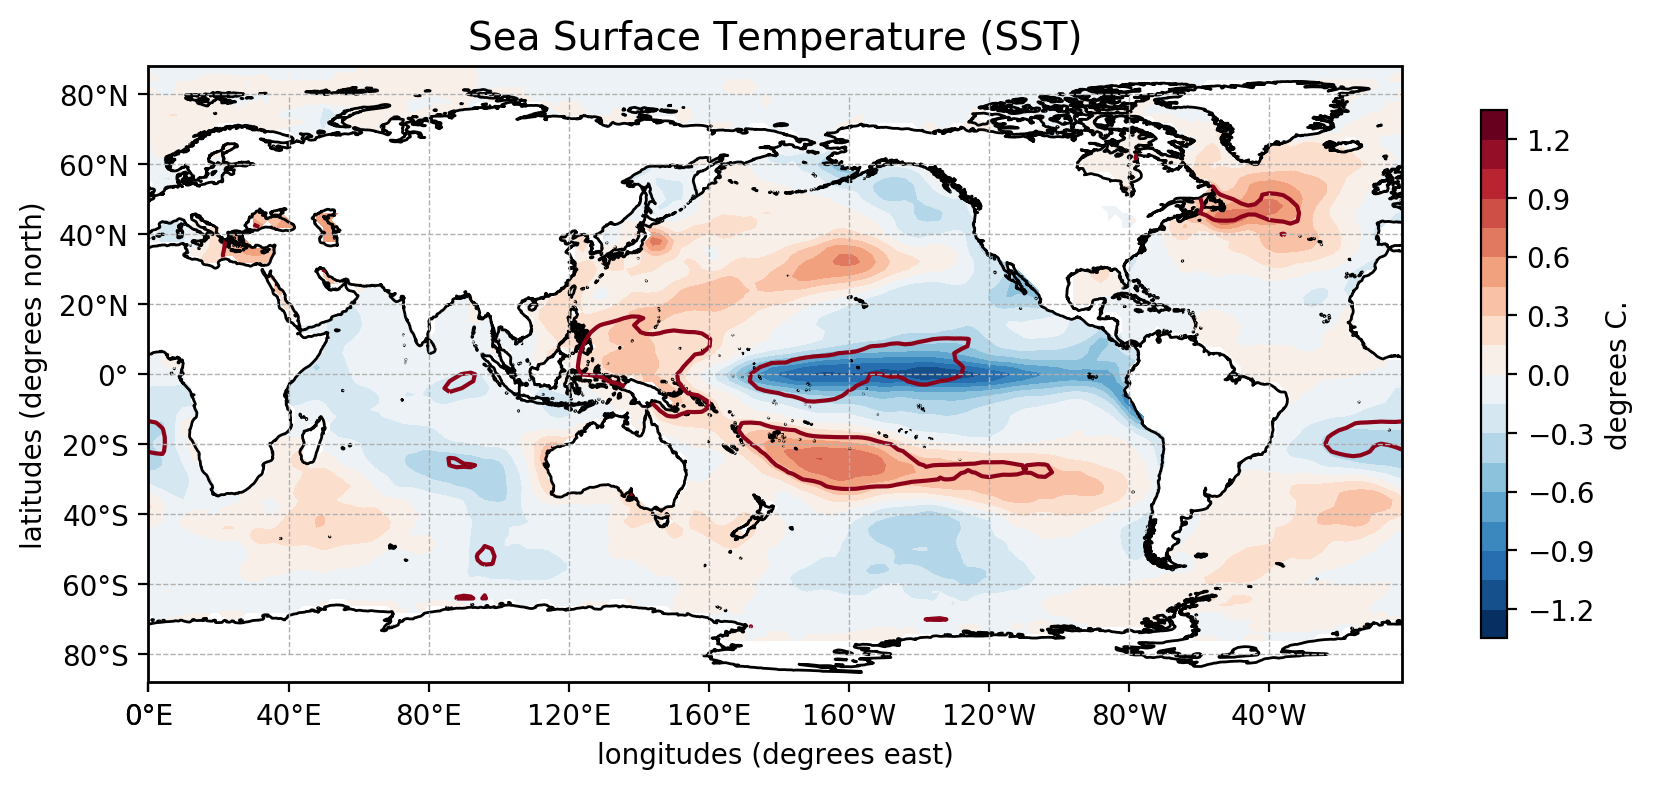

In [10]:
f, ax = scalar_plot(sst).plot()